## Estimation du biais d'une pièce de monnaie par des méthodes fréquentistes et bayésiennes

Vous travaillez sur un projet pour déterminer le biais d'une pièce de monnaie - c'est-à-dire la probabilité que la pièce atterrisse sur pile lorsqu'elle est lancée. Vous avez pour tâche d'aborder le problème à la fois d'un point de vue fréquentiste et du point de vue bayésien, ainsi que de comparer les résultats.

Pour l'approche fréquentiste, vous devez estimer le biais de la pièce comme la proportion de piles observée dans une série de lancers de pièce. Cependant, vous voulez aussi incorporer des croyances antérieures sur le biais de la pièce en utilisant l'approche bayésienne. Pour cela, vous devez représenter différents états de croyance concernant le biais : aucune préférence initiale (croyance uniforme), une croyance que la pièce soit biaisée en faveur de face, et une croyance qu'elle soit biaisée en faveur de pile.

La simulation doit être reproductible, donc vous devez définir une initialisation aléatoire (angl. random seed) avant de générer les lancers de pièce. Après avoir simulé un petit nombre de lancers (disons 10 lancers pour illustrer le concept avec une taille d'échantillon réduite), vous devrez visualiser l'estimation fréquentiste et les probabilités bayésiennes a priori et a postériori, pour comparer comment chaque probabilité a priori affecte la croyance postérieure sur le biais de la pièce après observation des données.

Le projet exige que vous traciez l'estimation fréquentiste comme une ligne verticale et que vous utilisiez des distributions bêta pour les a priori et postériori bayésiens. Chaque distribution a priori et postérieure doit être tracée sur le même graphique pour comparer facilement les différentes croyances. Enfin, présentez vos conclusions de manière à ce qu'un public non technique puisse comprendre, en expliquant les différences entre les estimations fréquentistes et bayésiennes. Le code pour les graphiques est déjà terminé, vous avez juste besoin de calculer la valeur pour les variables.

Votre code Python devrait effectuer les étapes suivantes :

- Définir une initialisation pour rendre la simulation reproductible.
- Simuler 10 lancers de pièce en supposant un vrai biais (par exemple, 70% pour pile).
- Calculer l'estimation fréquentiste du biais de la pièce.
- Définir différents a priori pour représenter différentes croyances concernant le biais de la pièce.
- Pour chaque a priori, calculer la probabilité bayésienne a postériori en mettant à jour l'a priori avec le nombre observé de piles et de faces.
- Tracer à la fois l'estimation fréquentiste et les probablités a priori et a postériori bayésiens sur le même graphique.
- Afficher le graphique résultant.

### Choses à se rappeler :

1. La fonction de masse de probabilité (FMP) d'un lancer de pièce suit une distribution binomiale car un lancer de pièce est un essai de Bernoulli, qui est une expérience aléatoire où il existe exactement deux issues possibles - habituellement appelées "succès" et "échec". 

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

2. L'approche bayésienne de mise à jour des croyances dans le contexte d'une fonction de vraisemblance binomiale implique l'utilisation de la distribution bêta comme a priori car c'est l'a priori conjugué pour la vraisemblance binomiale.

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

3. L'a priori bêta a une PDF comme suit :

$$
f(p|\alpha, \beta) = \frac{p^{\alpha - 1}(1 - p)^{\beta - 1}}{B(\alpha, \beta)}
$$

4. Vous pouvez utiliser la fonction `beta` de la bibliothèque `scipy.stats`, et la `binomial` de la bibliothèque `numpy.random`.


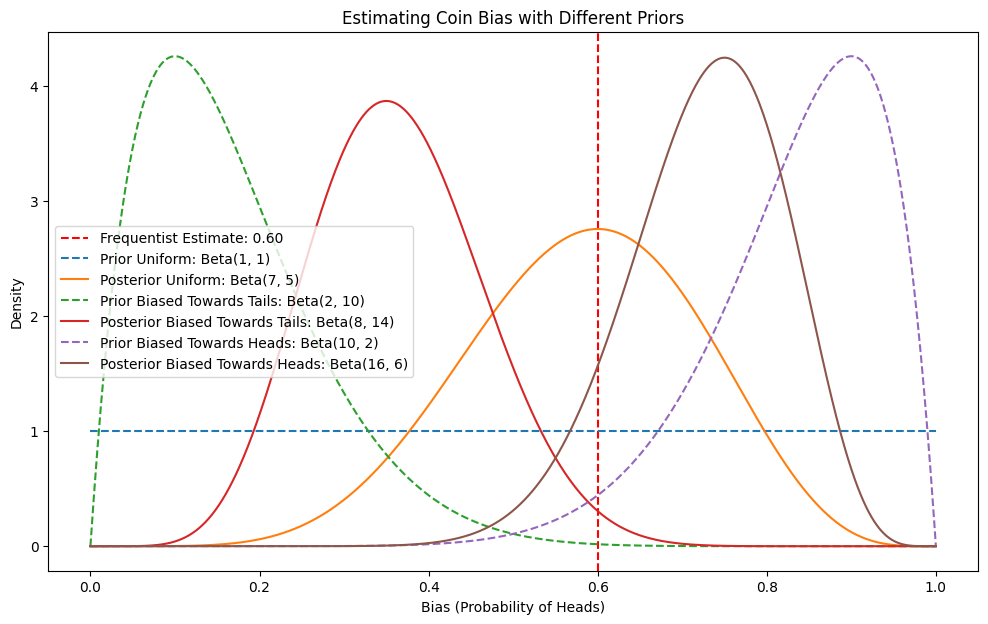

In [44]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True bias of the coin (for simulation purposes)
True_bias = 0.7

# Reduce sample size

# Simulate N coin flips (1 is heads, 0 is tails)
N = 10
simu = np.random.choice(["Face", "Pile"], p=[True_bias, 1-True_bias], size=N)


# Frequentist Approach: Estimate bias as proportion of heads
count = np.unique_counts(simu).counts
frequentist_estimate = count[0]/N #Face freq

# Define different priors
priors = {
    "Uniform": (1, 1),
    "Biased Towards Tails": (2, 10),
    "Biased Towards Heads": (10, 2)
}

plt.figure(figsize=(12, 7))
x = np.linspace(0, 1, 1000)

# Plot the Frequentist Estimate
plt.axvline(frequentist_estimate, color='red', linestyle='--', label=f'Frequentist Estimate: {frequentist_estimate:.2f}')


for label, (alpha_prior, beta_prior) in priors.items():
    # Bayesian Approach: Update the prior with observed data
    alpha_posterior = alpha_prior + count[0]
    beta_posterior = beta_prior + count[1]

    # Plot the prior and posterior distributions
    plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), '--', label=f'Prior {label}: Beta({alpha_prior}, {beta_prior})')
    plt.plot(x, beta.pdf(x, alpha_posterior, beta_posterior), label=f'Posterior {label}: Beta({alpha_posterior}, {beta_posterior})')

plt.title("Estimating Coin Bias with Different Priors")
plt.xlabel("Bias (Probability of Heads)")
plt.ylabel("Density")
plt.legend()
plt.show()


## Comments:

Increment the number of coin flips until 100 in increments of 10. What do you observe? Is it what you expected? Why?